In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('DigiHack Dataset.xlsx')
df.head()

,ID,Age,Customer_type,Gross_income,Net_income,SEX,Type_of_industry,Marital_Status,Months_in_city,Months_in_current_job,...,ACCOUNT_12,ACCOUNT_13,ACCOUNT_14,ACCOUNT_15,ACCOUNT_16,ACCOUNT_17,ACCOUNT_18,ACCOUNT_19,ACCOUNT_20,ACCOUNT_21
0,1,42.0,SELF EMPLOYED,91666.67,91666.6667,MALE,CONSTRUCTION,MARRIED,0.0,96,...,13,0,5,3,0,3,1837374,0,1837374,1657
1,1,42.0,SELF EMPLOYED,91666.67,91666.6667,MALE,CONSTRUCTION,MARRIED,0.0,96,...,13,0,5,3,0,3,1837374,0,1837374,1657
2,2,38.0,SALARIED,150000.00,30000.0000,FEMALE,OTHERS,MARRIED,0.0,120,...,4,0,3,2,0,2,10380,0,10380,124
3,2,38.0,SALARIED,150000.00,30000.0000,FEMALE,OTHERS,MARRIED,0.0,120,...,4,0,3,2,0,2,10380,0,10380,124
4,3,36.0,SELF EMPLOYED,188183.33,188183.3333,MALE,OTHERS,MARRIED,0.0,0,...,30,2,21,8,1,7,3445241,1536325,1908916,2534


In [3]:
df.isnull().sum()

ID                         0
Age                        1
Customer_type              0
Gross_income               0
Net_income                 0
SEX                        4
Type_of_industry           5
Marital_Status             4
Months_in_city             4
Months_in_current_job      0
Org_Type                   0
Bank_balance             636
Debt_ratio                 0
Target                     0
ENQ_1                      0
ENQ_2                      0
ENQ_3                      0
ENQ_4                      0
ENQ_5                      0
ENQ_6                      0
ENQ_7                      0
ENQ_8                      0
ACCOUNT_9                  0
ACCOUNT_10                 0
ACCOUNT_11                 0
ACCOUNT_12                 0
ACCOUNT_13                 0
ACCOUNT_14                 0
ACCOUNT_15                 0
ACCOUNT_16                 0
ACCOUNT_17                 0
ACCOUNT_18                 0
ACCOUNT_19                 0
ACCOUNT_20                 0
ACCOUNT_21    

In [4]:
df.shape

(3980, 35)

In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'age', 'customer_type', 'gross_income', 'net_income', 'sex',
       'type_of_industry', 'marital_status', 'months_in_city',
       'months_in_current_job', 'org_type', 'bank_balance', 'debt_ratio',
       'target', 'enq_1', 'enq_2', 'enq_3', 'enq_4', 'enq_5', 'enq_6', 'enq_7',
       'enq_8', 'account_9', 'account_10', 'account_11', 'account_12',
       'account_13', 'account_14', 'account_15', 'account_16', 'account_17',
       'account_18', 'account_19', 'account_20', 'account_21'],
      dtype='object')

In [6]:
col = df.dtypes.to_dict()

In [7]:
for i,j in col.items():
    if j =='object':
        print(i+' : '+ str(len(df[i].unique())))
        print(df[i].unique())
        print('-'*65)

customer_type : 3
['SELF EMPLOYED' 'SALARIED' 'NON EARNING']
-----------------------------------------------------------------
sex : 3
['MALE' 'FEMALE' nan]
-----------------------------------------------------------------
type_of_industry : 81
['CONSTRUCTION' 'OTHERS' 'AGRICULTURE' 'FMCG' 'EDUCATION'
 'GEMS AND JEWELLRY' 'TEXTILES' 'CONSUMER ELECTRONICS'
 'MILK AND DAIRY PRODUCTS' 'FOOD PRODUCTS' 'TRANSPORT LOGISTICS'
 'TEXTILE READY MADE GARMENTS' 'AUTOMOTIVE'
 'PLASTIC PIPE AND PIPE FITTINGS' 'TRAVEL AGENTS AND TOUR OPERATORS'
 'OIL AND GAS ALLIED' 'GOVERNMENT' 'BANKING AND FINANCE' 'MEDIA'
 'ELECTRONICS' 'INSTITUTIONS AND TRUST' 'HOTELS AND RESORTS'
 'ELECTRICAL MACHINERY' 'ELECTRICAL EQUIPMENT AND COMPONENTS'
 'PRINT MANUFACTURE RECORD MEDIA' 'ENGINEERING'
 'HEALTHCARE AND HEALTHCARE PROVIDERS' 'TRANSPORT OPERATOR'
 'AUTO COMPONENTS' 'IT AND COMMUNICATION' 'PAINTS'
 'TEXTILE WEAVING KNITTING AND PROCESSING' 'IT HARDWARE'
 'MEDICAL EQUIPMENT' 'WOOD AND WOOD PRODUCTS'
 'HOSPITALS AN

In [8]:
df.rename(columns = {'enq_1':'days_last enq',
                     'enq_2': 'days_hl_last_enq',
                     'enq_3': 'no_enq_l3',
                     'enq_4': 'no_hl_enq_l3',
                     'enq_5': 'no_enq_l12',
                     'enq_6': 'no_hl_enq_l12',
                     'enq_7': 'no_enq',
                     'enq_8': 'no_hl_enq',
                     'account_9': 'no_def_l3',
                     'account_10': 'no_def_l12',
                     'account_11': 'days_last_acc_lc',
                     'account_12': 'no_acc_lc',
                     'account_13':'no_hl_acc_lc',
                     'account_14': 'no_unsec_acc_lc',
                     'account_15': 'no_live_acc',
                     'account_16': 'no_live_hl_acc',
                     'account_17': 'no_live_unsec_acc',
                     'account_18': 'os_amt',
                     'account_19':'sec_os_amt',
                     'account_20': 'unsec_os_amt',
                     'account_21': 'avg_debt_days',},inplace = True)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3980.0,1.906402e+03,1.146058e+03,1.0,909.750000,1904.50,2899.250,3.895000e+03
age,3979.0,3.835361e+01,8.387179e+00,2.0,32.000000,38.00,44.000,7.100000e+01
gross_income,3980.0,8.728823e+04,4.493592e+05,0.0,21000.000000,33052.50,51455.105,1.466248e+07
net_income,3980.0,7.962038e+04,4.201051e+05,0.0,23863.562475,35333.50,54421.500,1.466248e+07
months_in_city,3976.0,1.741768e+02,1.721430e+02,0.0,0.000000,120.00,300.000,7.440000e+02
months_in_current_job,3980.0,1.030009e+03,5.469251e+04,0.0,4.000000,48.00,120.000,3.441168e+06
bank_balance,3344.0,1.426380e+05,1.130916e+06,-2965788.0,9428.250000,25432.00,72041.500,4.667487e+07
debt_ratio,3980.0,8.693371e+03,5.733927e+04,0.0,0.300000,0.47,0.590,1.311486e+06
target,3980.0,7.738693e-02,2.672380e-01,0.0,0.000000,0.00,0.000,1.000000e+00
days_last enq,3980.0,1.836776e+02,3.955958e+02,0.0,9.000000,38.00,156.000,4.492000e+03


In [10]:
df.drop_duplicates(subset=['id'],inplace=True)

In [11]:
missing_number = df.isnull().sum().sort_values(ascending=False)
missing_percentage = missing_number * 100 / len(df)
missing_info = pd.concat([missing_number, missing_percentage], axis=1, keys=['missing number', 'missing percentage'])
missing_info.head(10)

,missing number,missing percentage
bank_balance,626,16.076014
type_of_industry,5,0.128403
sex,4,0.102722
marital_status,4,0.102722
months_in_city,4,0.102722
age,1,0.025681
id,0,0.000000
no_unsec_acc_lc,0,0.000000
no_def_l12,0,0.000000
days_last_acc_lc,0,0.000000


In [12]:
df['age_bkt'] = pd.qcut(df.age,q=5)

In [13]:
df[['age','age_bkt']].sample(10)

,age,age_bkt
1200,49.0,"(46.0, 71.0]"
736,42.0,"(40.0, 46.0]"
629,44.0,"(40.0, 46.0]"
2834,25.0,"(1.999, 31.0]"
651,37.0,"(35.0, 40.0]"
2187,31.0,"(1.999, 31.0]"
3858,34.0,"(31.0, 35.0]"
2198,43.0,"(40.0, 46.0]"
1649,30.0,"(1.999, 31.0]"
2227,41.0,"(40.0, 46.0]"


In [14]:
sal_bb = df[df['customer_type']=='SALARIED']['bank_balance'].mean()
se_bb = df[df['customer_type']=='SELF EMPLOYED']['bank_balance'].mean()
ne_bb = df[df['customer_type']=='NON EARNING']['bank_balance'].mean()

In [15]:
df['bb'] = np.where((df['customer_type'] == 'SALARIED') & df['bank_balance'].isna(), sal_bb,
          np.where((df['customer_type'] == 'SELF EMPLOYED') & df['bank_balance'].isna(), se_bb,
        np.where((df['customer_type'] == 'NON EARNING') & df['bank_balance'].isna(), ne_bb,
            df['bank_balance']  # default value if none of the conditions are met
        )
    )
)


In [16]:
df.dtypes

id                          int64
age                       float64
customer_type              object
gross_income              float64
net_income                float64
sex                        object
type_of_industry           object
marital_status             object
months_in_city            float64
months_in_current_job       int64
org_type                   object
bank_balance              float64
debt_ratio                float64
target                      int64
days_last enq               int64
days_hl_last_enq            int64
no_enq_l3                   int64
no_hl_enq_l3                int64
no_enq_l12                  int64
no_hl_enq_l12               int64
no_enq                      int64
no_hl_enq                   int64
no_def_l3                   int64
no_def_l12                  int64
days_last_acc_lc            int64
no_acc_lc                   int64
no_hl_acc_lc                int64
no_unsec_acc_lc             int64
no_live_acc                 int64
no_live_hl_acc

In [17]:
print(df.shape)
df.drop(columns = 'bank_balance',inplace=True)
df.dropna(inplace=True)
print(df.shape)

(3894, 37)
(3885, 36)


### Bivariate Distribution

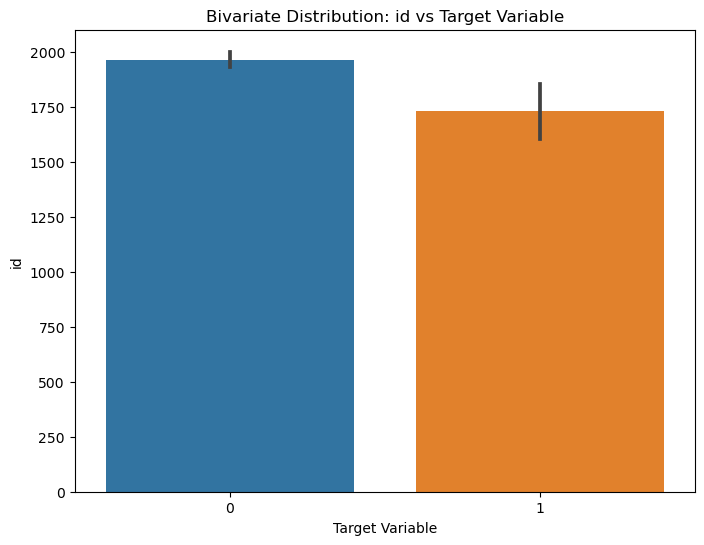

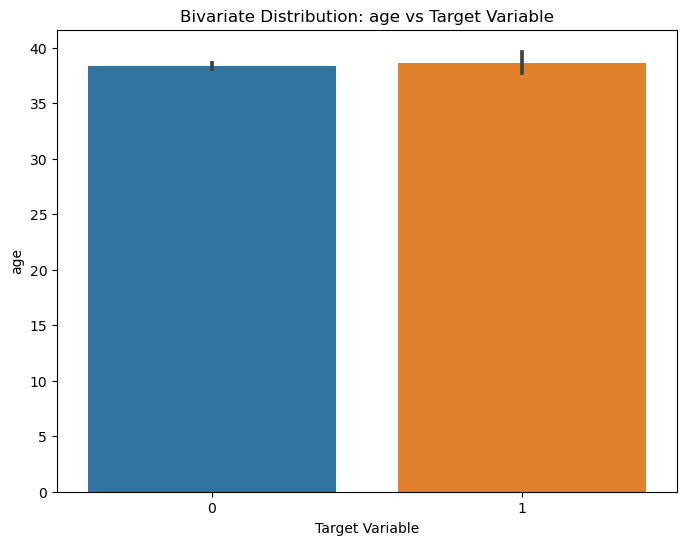

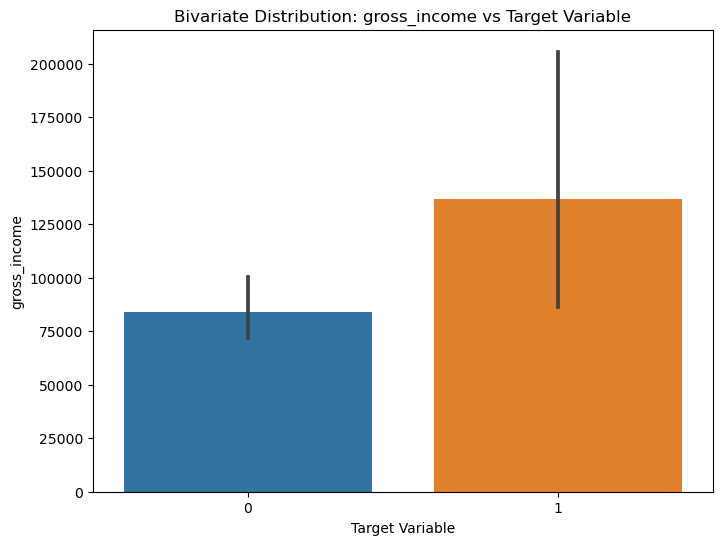

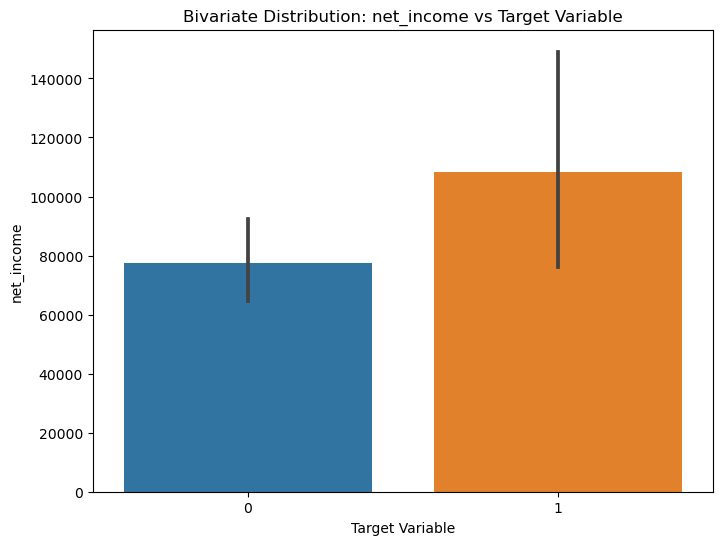

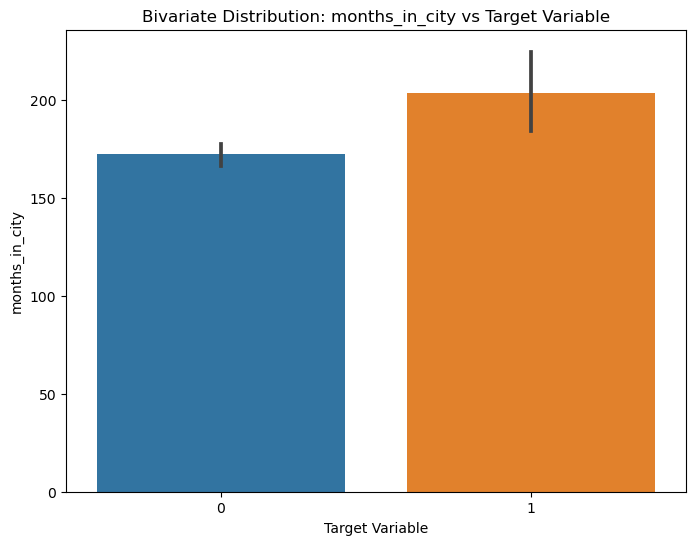

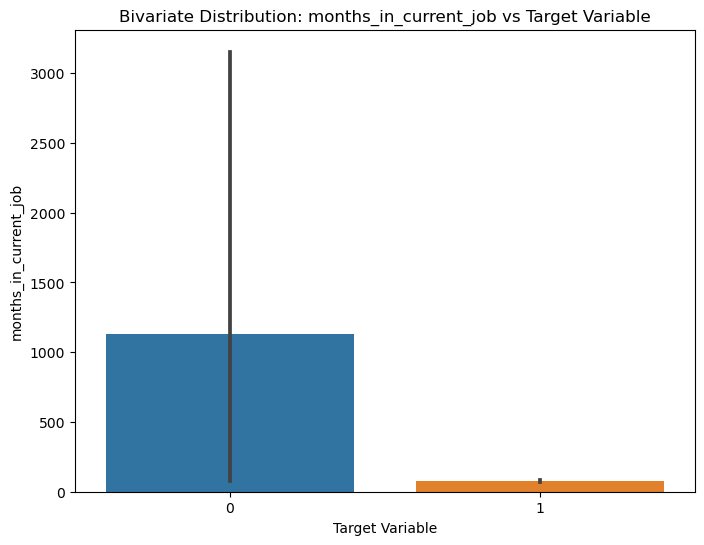

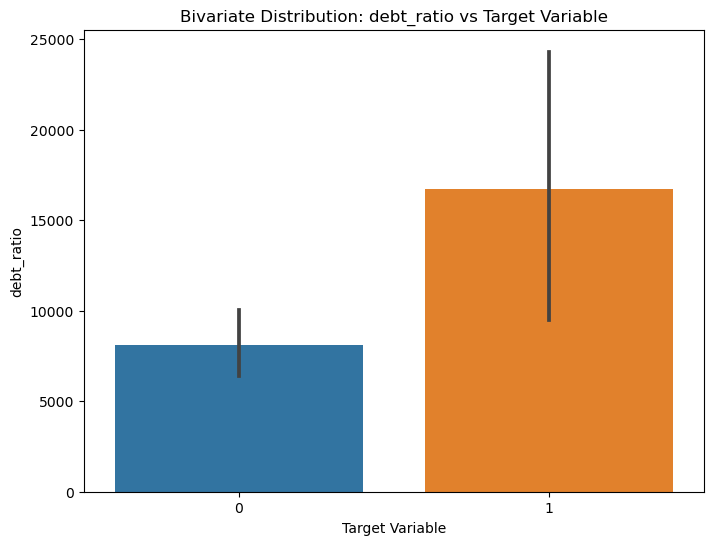

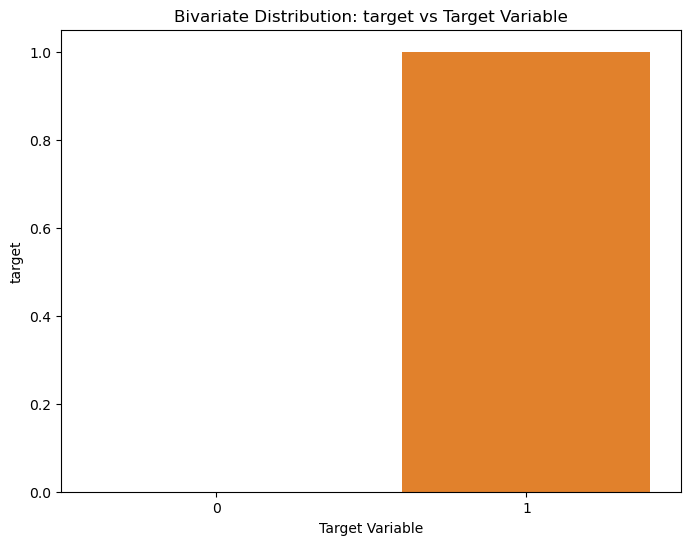

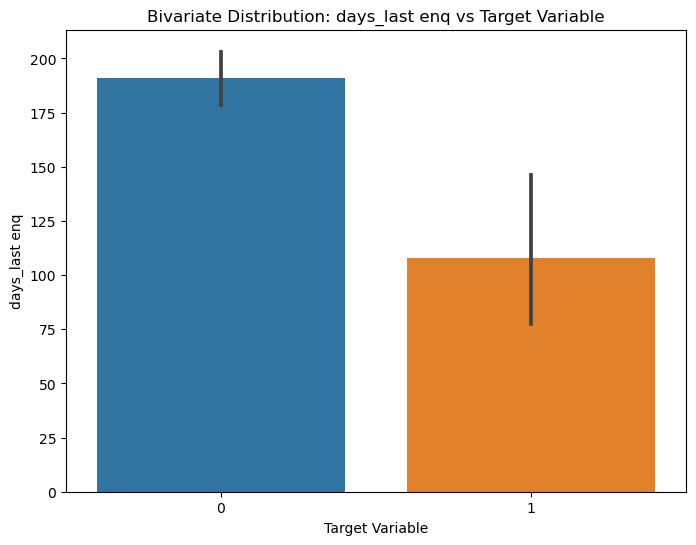

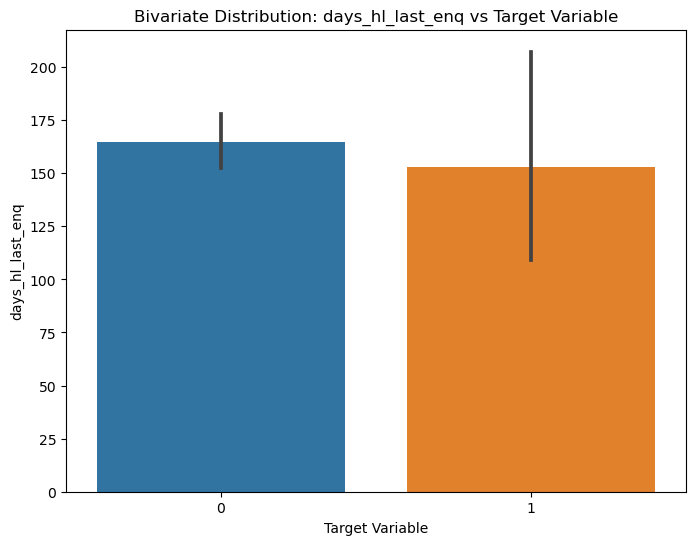

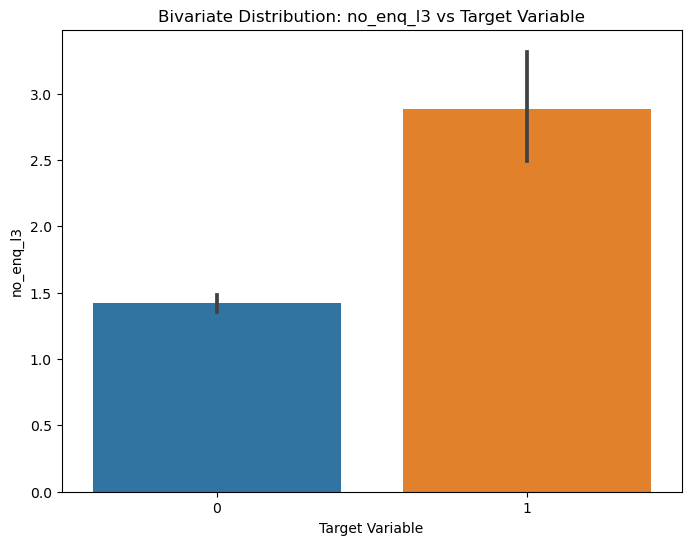

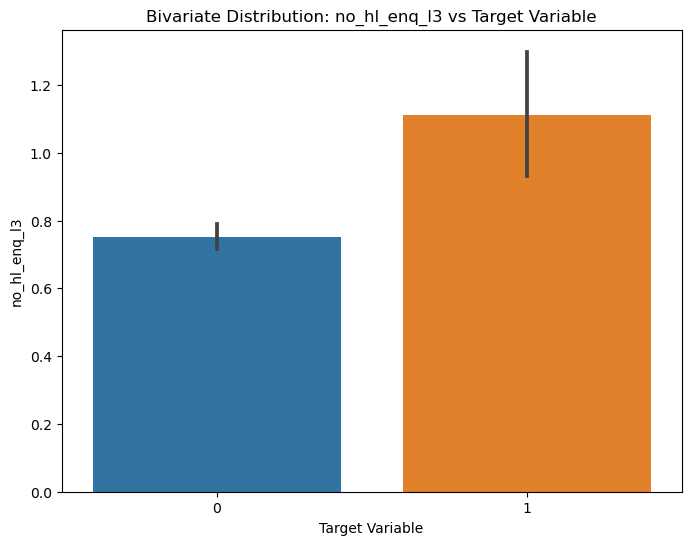

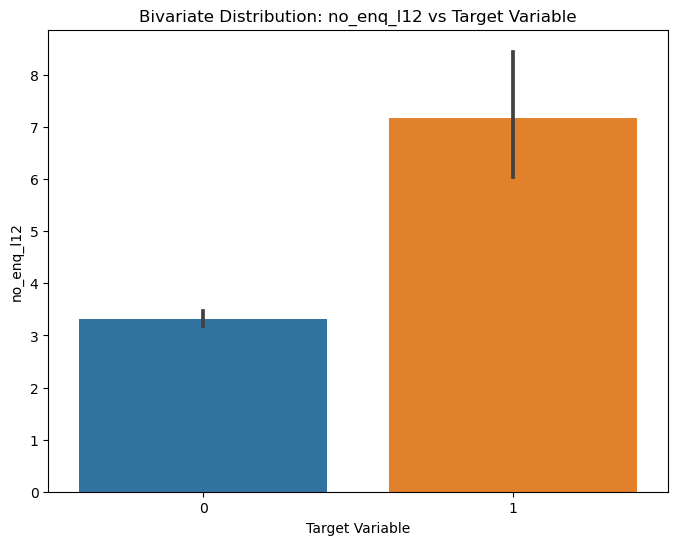

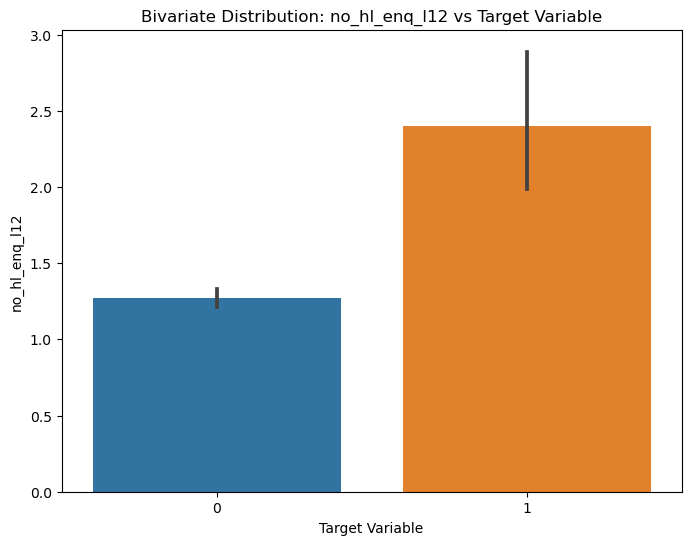

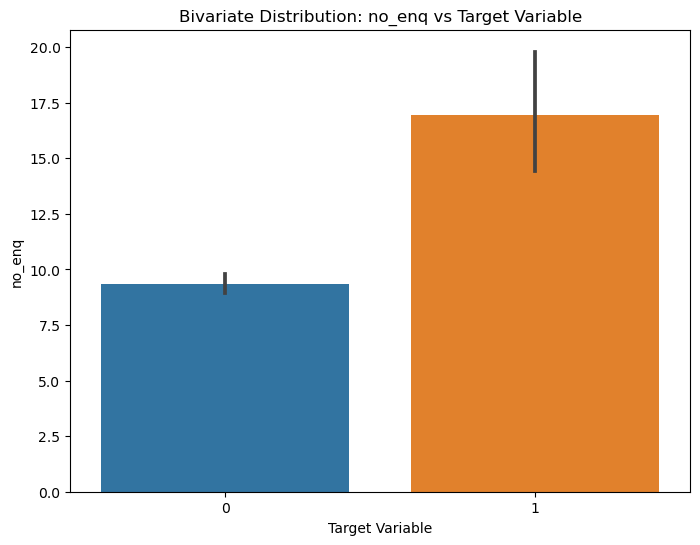

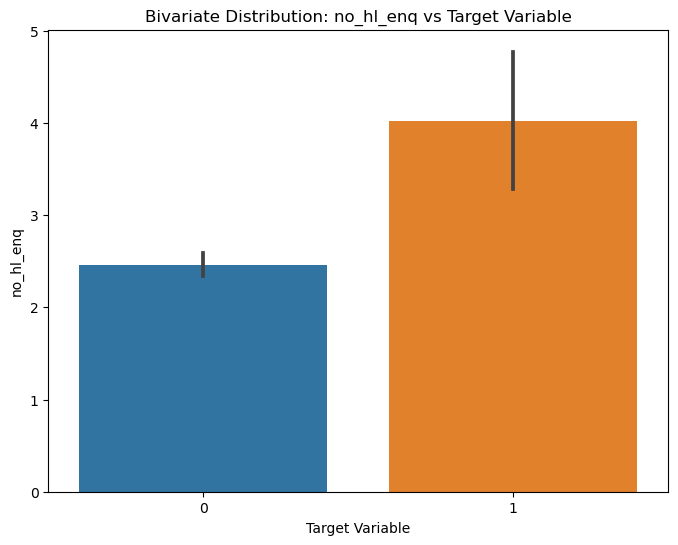

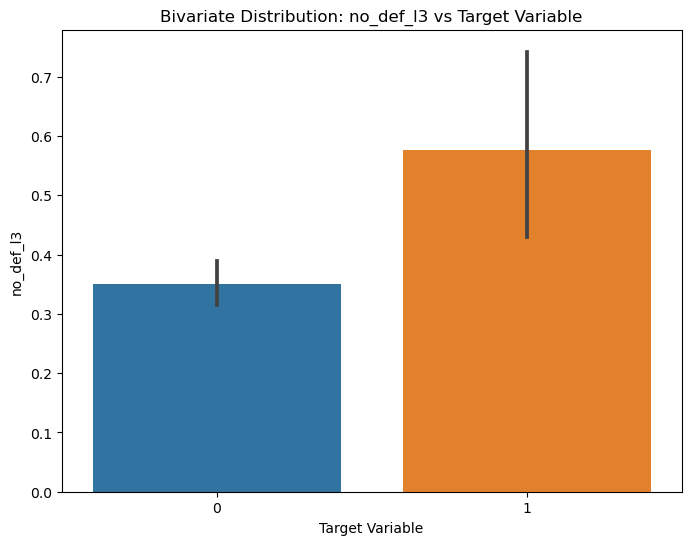

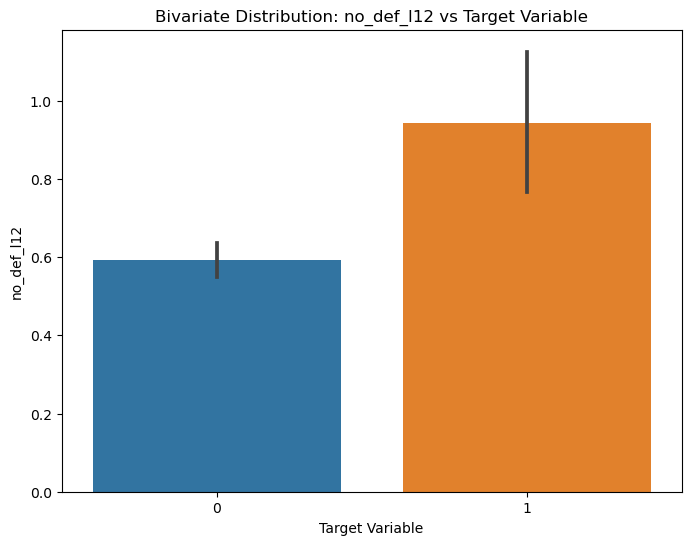

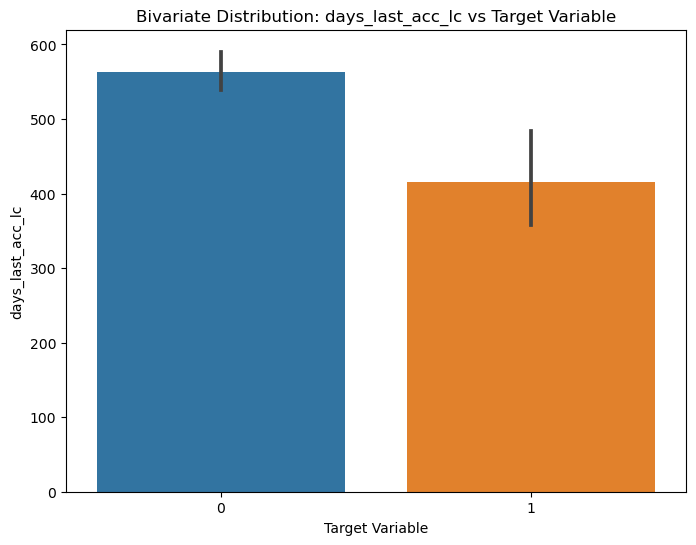

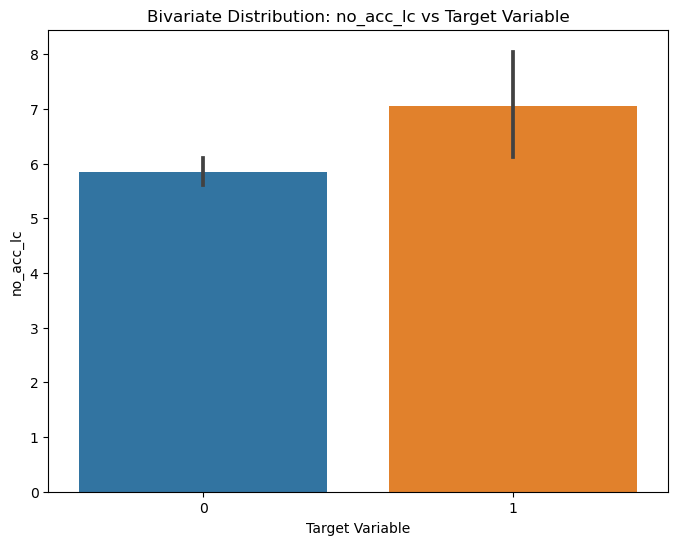

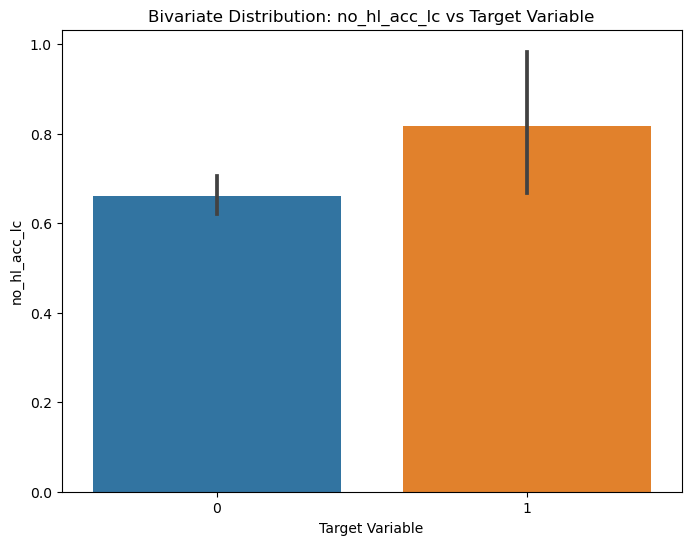

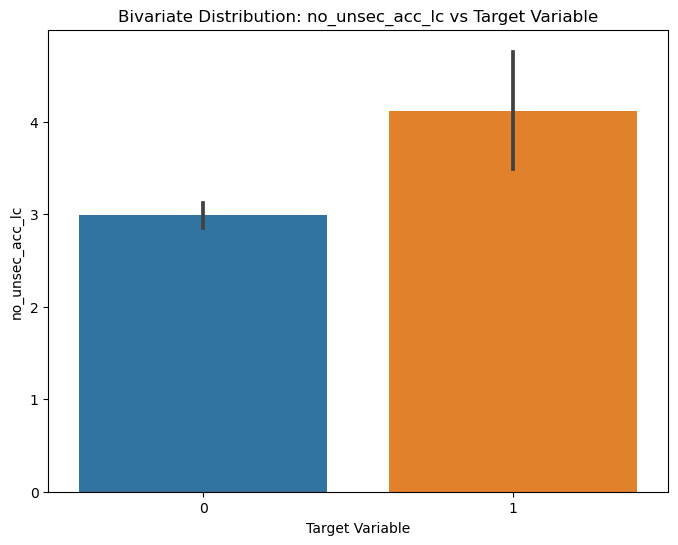

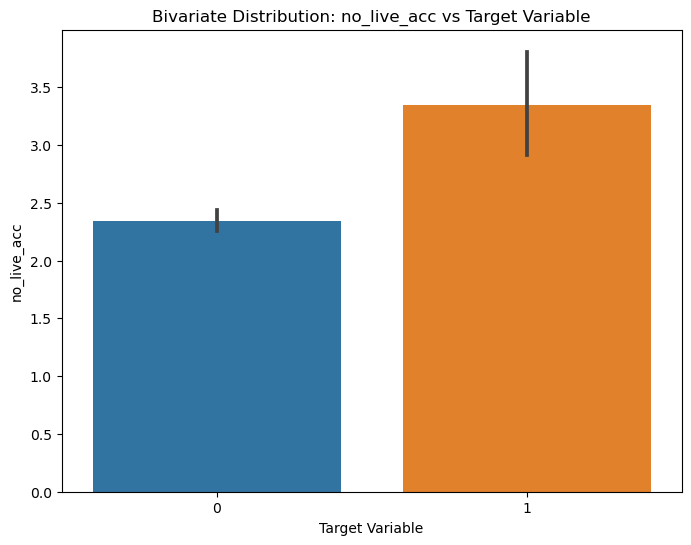

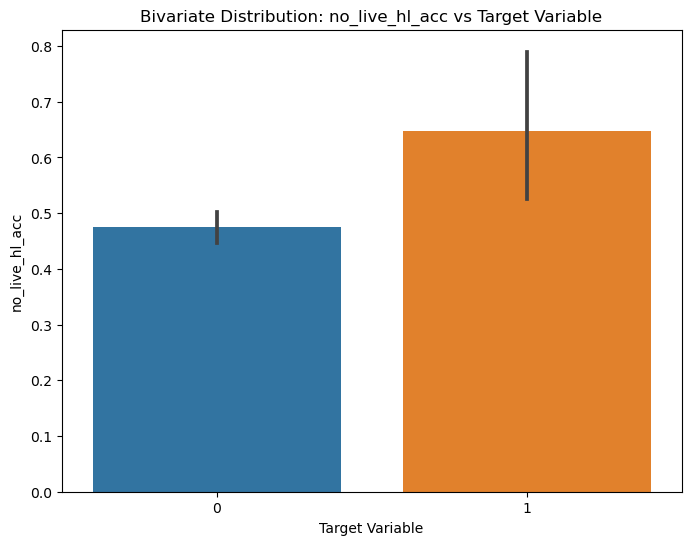

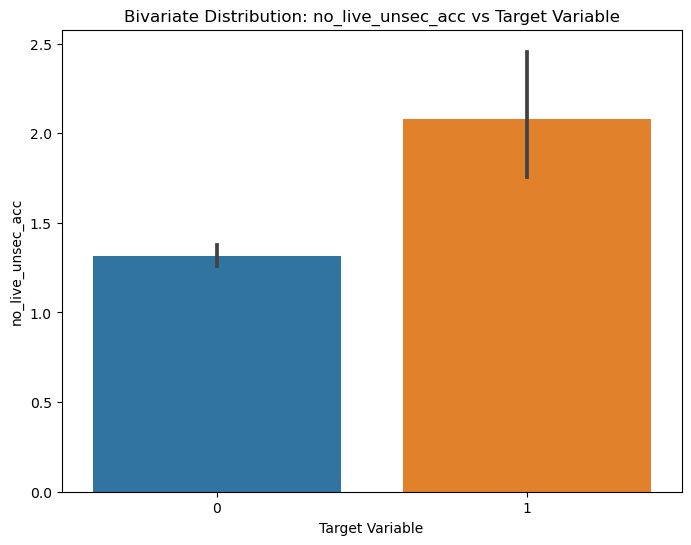

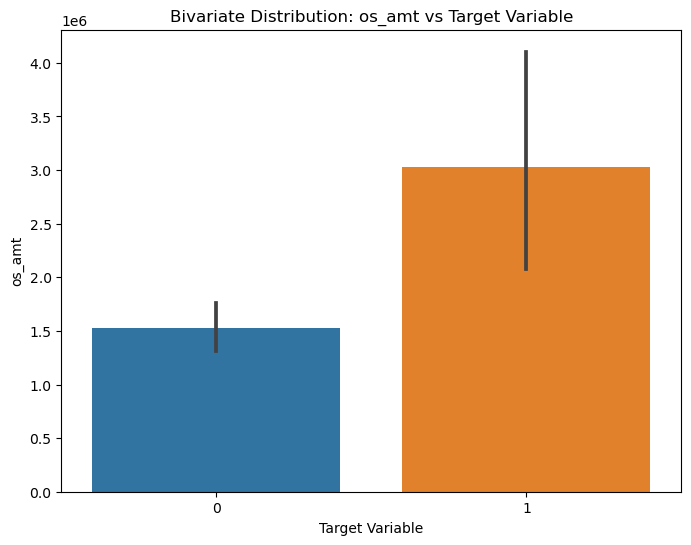

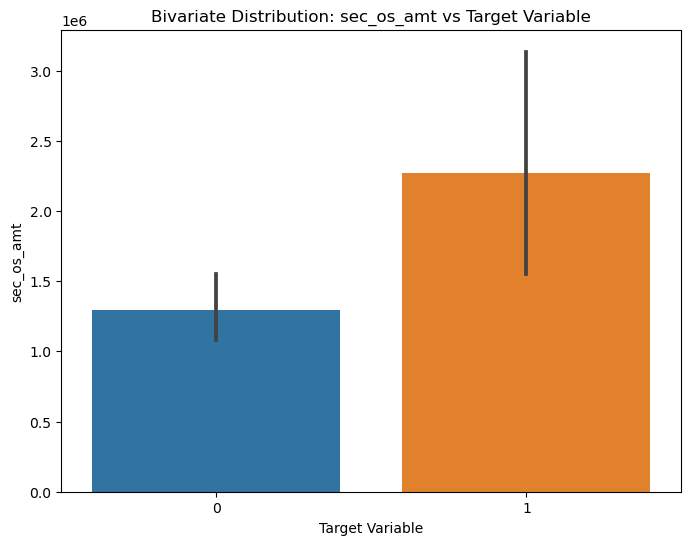

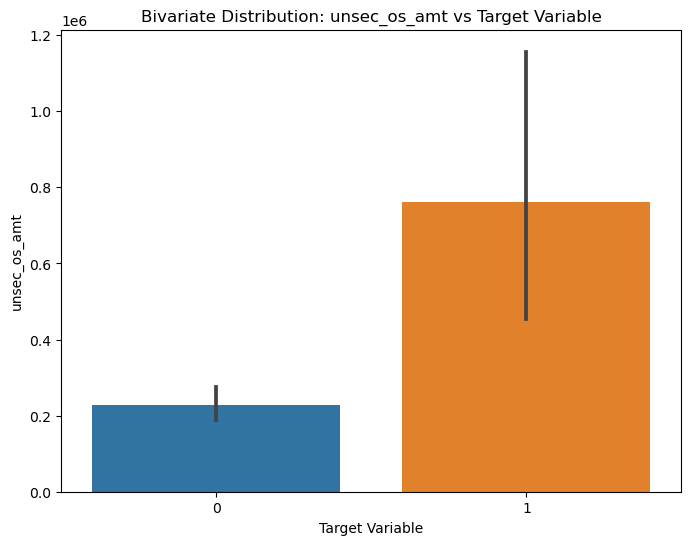

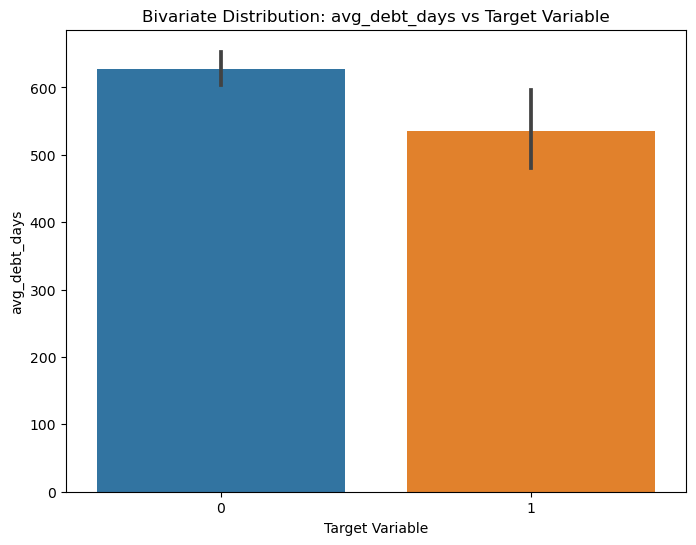

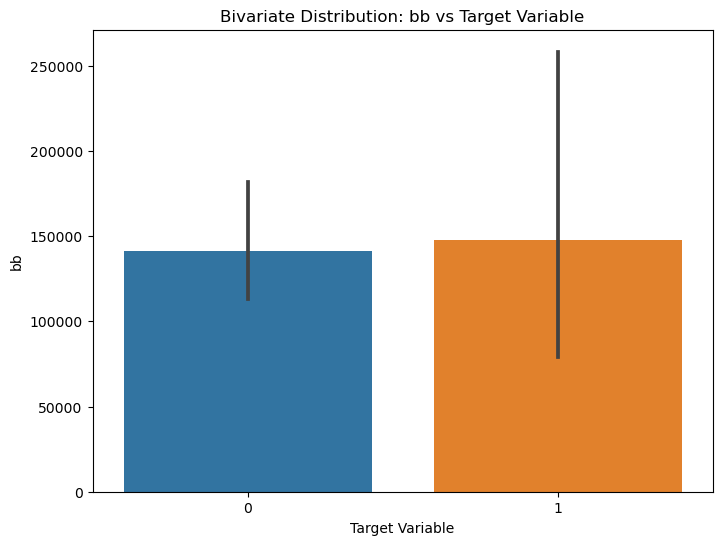

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_vars = df.select_dtypes(include='number').columns.tolist()

# Creating individual plots for each numeric variable with respect to the target variable
for var in numeric_vars:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='target', y=var, data=df)
    plt.title(f'Bivariate Distribution: {var} vs Target Variable')
    plt.xlabel('Target Variable')
    plt.ylabel(var)
    plt.show()

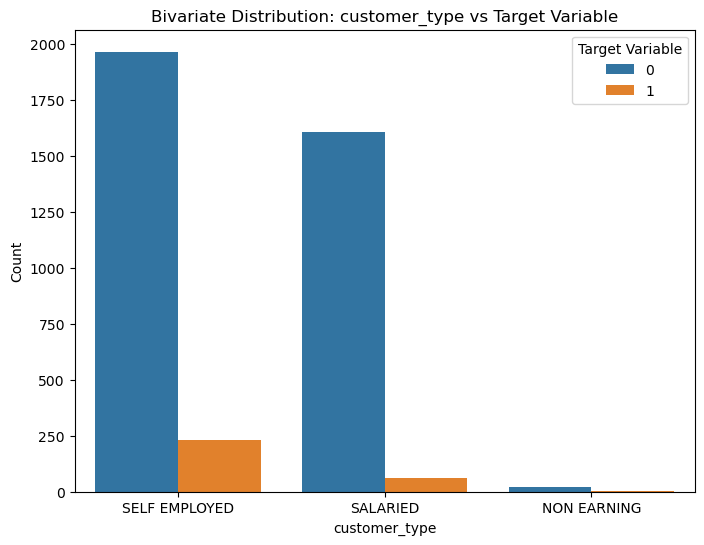

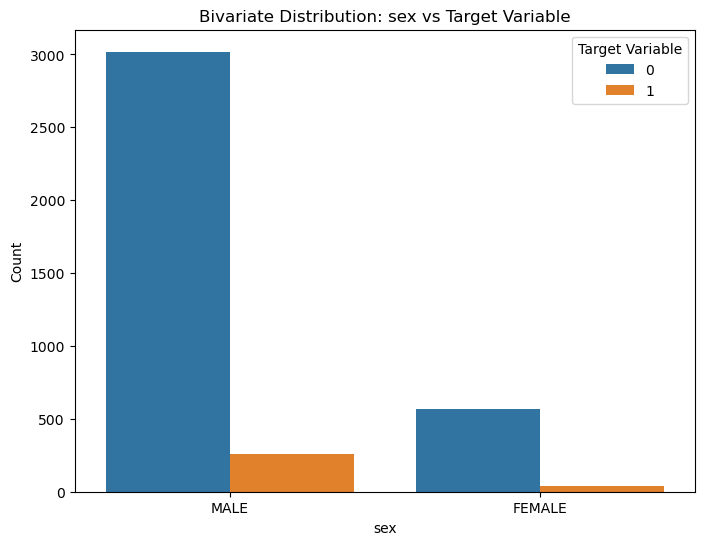

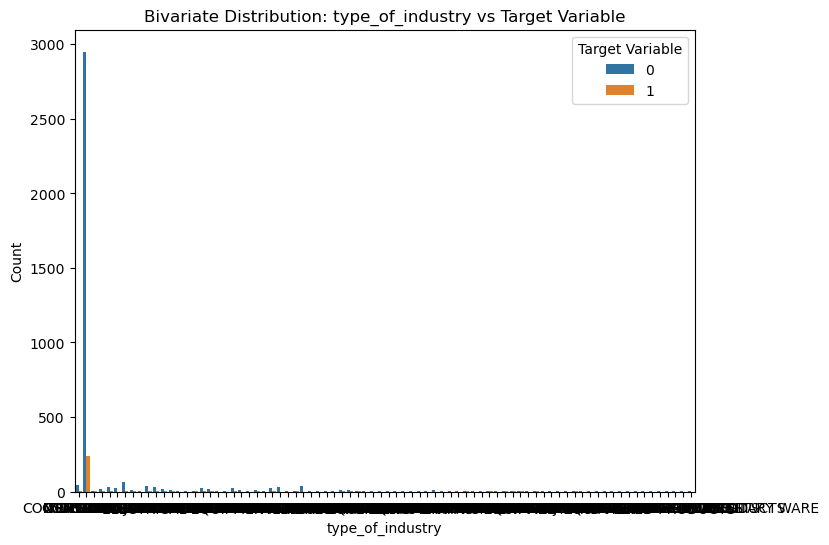

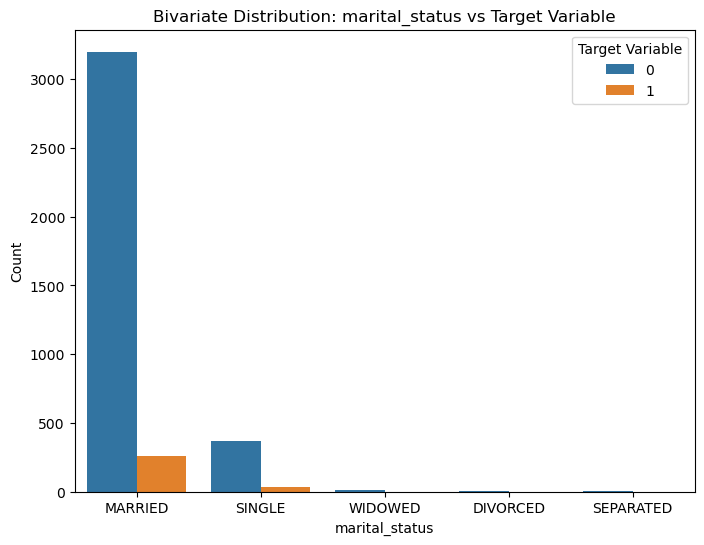

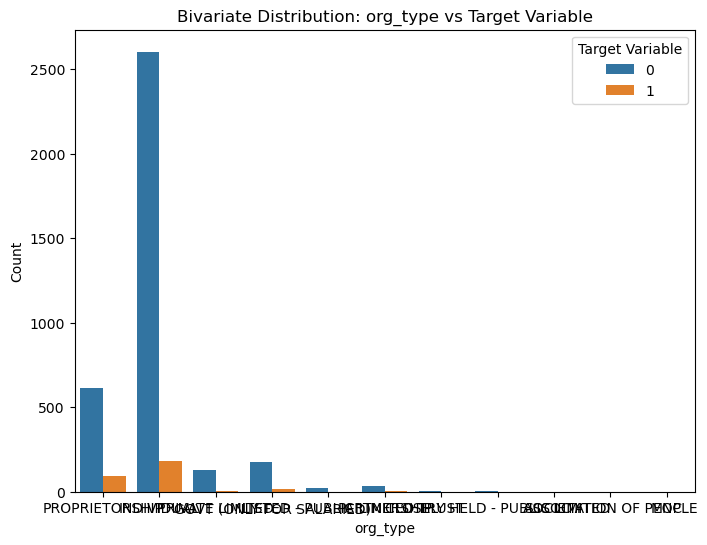

In [19]:
categorical_vars = df.select_dtypes(include='object').columns.tolist()

# Creating individual plots for each categorical variable with respect to the target variable
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, hue='target', data=df)
    plt.title(f'Bivariate Distribution: {var} vs Target Variable')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Target Variable')
    plt.show()

## Variable Creation

In [20]:
temp = df.copy()

In [21]:
col = temp.describe().columns.tolist()
col.remove('id')
col.remove('target')

In [22]:
print(temp.shape)
for i in col:
    for j in col:
        if i==j:
            continue
        else:
            temp[i+"_-_"+j] = temp[i]/temp[j]
print(temp.shape)

(3885, 36)
(3885, 792)


In [23]:
df.shape

(3885, 36)

In [24]:
col = temp.dtypes.to_dict()
del col['id']
del col['target']

### Information Value 

In [25]:
iv = pd.DataFrame()  # Initialize iv as an empty DataFrame

t = pd.pivot_table(temp, index=df['customer_type'], columns='target', values='id', aggfunc='count')
t['good'] = t[0] / t[0].sum()
t['bad'] = t[1] / t[1].sum()
t['woe'] = np.log(t['good'] / t['bad'])
t['abs'] = t['good'] - t['bad']
t['ivi'] = t['woe'] * t['abs']
t["IV"] = t['ivi'].sum()
t['name'] = 'customer_type'  # Assuming you want to assign the name 'customer_type' to this particular iteration

iv = pd.concat([iv, t])
iv

target,0,1,good,bad,woe,abs,ivi,IV,name
customer_type,,,,,,,,,
NON EARNING,20,1,0.005571,0.003390,0.496800,0.002181,0.001084,0.266553,customer_type
SALARIED,1605,62,0.447075,0.210169,0.754813,0.236906,0.178819,0.266553,customer_type
SELF EMPLOYED,1965,232,0.547354,0.786441,-0.362422,-0.239087,0.086650,0.266553,customer_type


In [26]:
iv = pd.DataFrame()
norun = []
for i,j in col.items():
    try:
        if j == 'object':
            t = pd.pivot_table(temp,index=i,columns='target',values = 'id',aggfunc='count')
            t['good'] = t[0]/t[0].sum()
            t['bad'] = t[1]/t[1].sum()
            t['woe'] = np.log(t['good']/t['bad'])
            t['abs'] = t['good'] - t['bad']
            t['ivi'] = t['woe'] * t['abs']
            t["IV"] = t['ivi'].sum()
            t['name'] = i
            iv = pd.concat([iv, t])
        else:
            df['qcut'] = pd.qcut(temp[i],10,duplicates='drop')
            t = pd.pivot_table(df,index=df['qcut'],columns='target',values = 'id',aggfunc='count')
            t['good'] = t[0]/t[0].sum()
            t['bad'] = t[1]/t[1].sum()
            t['woe'] = np.log(t['good']/t['bad'])
            t['abs'] = t['good'] - t['bad']
            t['ivi'] = t['woe'] * t['abs']
            t["IV"] = t['ivi'].sum()
            t['name'] = i
            iv = pd.concat([iv, t])
    except:
        norun.append(i)

In [27]:
iv.shape

(1093, 9)

In [28]:
len(norun)

645

In [29]:
iv.to_csv("IV.csv")

In [30]:
df_iv = iv.drop_duplicates(subset=['name','IV'])
df_iv = df_iv[['name','IV']]
df_iv.rename(columns={'name': 'Variable'}, inplace=True)
df_iv = df_iv.sort_values('IV',ascending=False)
df_iv.head(30)

target,Variable,IV
"(-0.001, 0.02]",no_enq_l12_-_age,0.314860
"(-0.001, 1.0]",no_enq_l12,0.312869
NON EARNING,customer_type,0.266553
"(-0.001, 1.0]",no_enq_l3,0.263441
"(-0.001, 0.25]",no_hl_enq_l3_-_no_enq_l3,0.243439
"(-0.001, 0.0204]",no_enq_l3_-_age,0.233349
"(-0.001, 0.0303]",no_enq_-_age,0.226904
"(-0.001, 1.0]",no_enq,0.226097
"(-0.001, 336.117]",net_income_-_age,0.221523
"(-0.001, 13720.0]",net_income,0.207719


In [31]:
temp1 = pd.get_dummies(temp)

In [32]:
temp1.isna().sum()

id                       0
age                      0
gross_income             0
net_income               0
months_in_city           0
                        ..
age_bkt_(1.999, 31.0]    0
age_bkt_(31.0, 35.0]     0
age_bkt_(35.0, 40.0]     0
age_bkt_(40.0, 46.0]     0
age_bkt_(46.0, 71.0]     0
Length: 892, dtype: int64

### Important Variables using Random Forest 

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
X = df.drop(['target','id'], axis=1)
X = pd.get_dummies(X)
y = df['target']
rf_classifier.fit(X, y)
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Variable': X.columns, 'Importance': feature_importances})
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Print or visualize the DataFrame to see feature importances
feature_importance_df.head(30)

,Variable,Importance
27,bb,0.055193
16,days_last_acc_lc,0.043529
5,debt_ratio,0.042861
1,gross_income,0.039565
23,os_amt,0.038763
2,net_income,0.038653
6,days_last enq,0.038422
26,avg_debt_days,0.036537
0,age,0.035907
3,months_in_city,0.035179


### Variable CLustering (Varclus)

In [34]:
from varclushi import VarClusHi
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.drop(['id','target'],axis=1,inplace=True)
vc = VarClusHi(numeric_df, maxeigval2=1, maxclus=None)
vc.varclus()

In [35]:
df_vc = vc.rsquare
df_vc

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,no_enq,0.644501,0.423555,0.616709
1,0,days_last_acc_lc,0.141208,0.060862,0.914447
2,0,no_acc_lc,0.658230,0.147574,0.400939
3,0,no_unsec_acc_lc,0.730617,0.119395,0.305907
4,0,no_live_acc,0.748675,0.256053,0.337827
5,0,no_live_unsec_acc,0.698645,0.142088,0.351266
6,0,unsec_os_amt,0.195140,0.088703,0.883203
7,1,no_hl_enq,0.655720,0.410722,0.584241
8,1,no_hl_acc_lc,0.747044,0.117757,0.286719
9,1,no_live_hl_acc,0.712118,0.087132,0.315360


In [36]:
merged_df = pd.merge(feature_importance_df, df_vc, on='Variable', how='outer')

In [37]:
# merged_df = merged_df[['Variable','iv','Importance','RS_Ratio','Cluster','RS_Own','RS_NC']]
# merged_df

## Variable Selection

From Variable Clustering

In [38]:
c = [['days_last_acc_lc','unsec_os_amt','no_enq','no_live_acc','no_acc_lc',
'no_hl_enq','no_live_hl_acc','os_amt',
'months_in_city','no_enq_l12','no_hl_enq_l12',
'bb','gross_income',
'no_def_l3','no_def_l12',
'months_in_current_job','avg_debt_days','age',
'days_last enq', 'days_hl_last_enq',
'debt_ratio']]
#21

In [39]:
df1 = df.copy()

In [40]:
df1.shape

(3885, 37)

In [41]:
df1['no_enq_l12_-_age'] = df1['no_enq_l12']/df1['age']
df1['no_hl_enq_l3_-_no_enq_l3'] = df1['no_hl_enq_l3']/df1['no_enq_l3']
df1['no_enq_-_age'] = df1['no_enq']/df1['age']
df1['net_income_-_age'] = df1['net_income']/df1['age']

### Model

In [42]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
#ROC CURVE
from sklearn.metrics import roc_curve, auc

In [43]:
df1.columns

Index(['id', 'age', 'customer_type', 'gross_income', 'net_income', 'sex',
       'type_of_industry', 'marital_status', 'months_in_city',
       'months_in_current_job', 'org_type', 'debt_ratio', 'target',
       'days_last enq', 'days_hl_last_enq', 'no_enq_l3', 'no_hl_enq_l3',
       'no_enq_l12', 'no_hl_enq_l12', 'no_enq', 'no_hl_enq', 'no_def_l3',
       'no_def_l12', 'days_last_acc_lc', 'no_acc_lc', 'no_hl_acc_lc',
       'no_unsec_acc_lc', 'no_live_acc', 'no_live_hl_acc', 'no_live_unsec_acc',
       'os_amt', 'sec_os_amt', 'unsec_os_amt', 'avg_debt_days', 'age_bkt',
       'bb', 'qcut', 'no_enq_l12_-_age', 'no_hl_enq_l3_-_no_enq_l3',
       'no_enq_-_age', 'net_income_-_age'],
      dtype='object')

In [44]:
len(df1.columns)

41

In [45]:
df_final = df1[['age','bb','gross_income','no_enq',
         'days_last_acc_lc','os_amt','unsec_os_amt','no_hl_enq',
         'months_in_current_job','months_in_city','avg_debt_days','debt_ratio',
         'customer_type','no_acc_lc','no_enq_l12','no_live_acc',
         'no_live_unsec_acc','no_def_l12',
         'no_enq_l12_-_age','no_enq_-_age','net_income_-_age','target'
        ]]

In [46]:
df_final.isna().sum()

age                      0
bb                       0
gross_income             0
no_enq                   0
days_last_acc_lc         0
os_amt                   0
unsec_os_amt             0
no_hl_enq                0
months_in_current_job    0
months_in_city           0
avg_debt_days            0
debt_ratio               0
customer_type            0
no_acc_lc                0
no_enq_l12               0
no_live_acc              0
no_live_unsec_acc        0
no_def_l12               0
no_enq_l12_-_age         0
no_enq_-_age             0
net_income_-_age         0
target                   0
dtype: int64

In [47]:
#Logistic without Binnning
x = df_final[['age','bb','gross_income','no_enq',
         'days_last_acc_lc','os_amt','unsec_os_amt','no_hl_enq',
         'months_in_current_job','months_in_city','avg_debt_days','debt_ratio',
         'no_acc_lc','no_enq_l12','no_live_acc',
         'no_live_unsec_acc','no_def_l12',
         'no_enq_l12_-_age','no_enq_-_age','net_income_-_age'
        ]]
y = df_final[['target']]
x = pd.get_dummies(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=23)  
log_reg = sm.Logit(y_train, x_train).fit()
x_train['pred_prob'] = log_reg.predict(x_train)
x_test['pred_prob'] = log_reg.predict(x_test)
fpr1, tpr1, thresholds1 = roc_curve(y_train, x_train['pred_prob'])
roc_auc1 = auc(fpr1, tpr1)
gini1 = (2*roc_auc1)-1
print("Area under the ROC curve for train dataset : %f" % roc_auc1)
print("---"*15)
fpr2, tpr2, thresholds2 = roc_curve(y_test, x_test['pred_prob'])
roc_auc2 = auc(fpr2, tpr2)
gini2 = (2*roc_auc2)-1
print("Area under the ROC curve for test dataset : %f" % roc_auc2)

Optimization terminated successfully.
         Current function value: 0.253827
         Iterations 12
Area under the ROC curve for train dataset : 0.647057
---------------------------------------------
Area under the ROC curve for test dataset : 0.635896


### Binning for Logistic Regression

In [48]:
print(x.columns)
print(len(x.columns))

Index(['age', 'bb', 'gross_income', 'no_enq', 'days_last_acc_lc', 'os_amt',
       'unsec_os_amt', 'no_hl_enq', 'months_in_current_job', 'months_in_city',
       'avg_debt_days', 'debt_ratio', 'no_acc_lc', 'no_enq_l12', 'no_live_acc',
       'no_live_unsec_acc', 'no_def_l12', 'no_enq_l12_-_age', 'no_enq_-_age',
       'net_income_-_age'],
      dtype='object')
20


In [49]:
bins1 = [-0.001, 1.0, 2.0, 4.0, 18.0]
bins2 = [-0.001, 1.0, 2.0, 7.0]
bins3 = [-0.001, 4684.0, 21456.2, 63512.6, 166176.4, 455665.4, 34221552.0]

In [50]:
df_final['age_bkt'] = pd.qcut(df_final['age'], q=5)
df_final['bb_bkt'] = pd.qcut(df_final['bb'],q=4)
df_final['gross_income_bkt'] = pd.qcut(df_final['gross_income'],q=5)
df_final['no_enq_bkt'] = pd.qcut(df_final['no_enq'],q=5)
df_final['days_last_acc_lc_bkt'] = pd.qcut(df_final['days_last_acc_lc'],q=5)
df_final['os_amt_bkt'] = pd.qcut(df_final['os_amt'],q=3)
df_final['unsec_os_amt_bkt'] = pd.cut(df_final['unsec_os_amt'], bins=bins3)
df_final['no_hl_enq_bkt'] = pd.qcut(df_final['no_hl_enq'],q=3)
df_final['months_in_current_job_bkt'] = pd.qcut(df_final['months_in_current_job'],q=4)
df_final['months_in_city_bkt'] = pd.qcut(df_final['months_in_city'],q=3)
df_final['avg_debt_days_bkt'] = pd.qcut(df_final['avg_debt_days'],q=4)
df_final['debt_ratio_bkt'] = pd.qcut(df_final['debt_ratio'],q=5)
df_final['no_acc_lc_bkt'] = pd.qcut(df_final['no_acc_lc'],q=3)
df_final['no_enq_l12_bkt'] = pd.qcut(df_final['no_enq_l12'],q=5)
df_final['no_live_acc_bkt'] = pd.qcut(df_final['no_live_acc'],q=4)
df_final['no_live_unsec_acc_bkt'] = pd.cut(df_final['no_live_unsec_acc'], bins=bins1, labels=['(-0.001, 1.0]', '(1.0, 2.0]', '(2.0, 4.0]', '(4.0, 18.0]'])
df_final['no_def_l12_bkt'] = pd.cut(df_final['no_def_l12'], bins=bins2, labels=['(-0.001, 1.0]', '(1.0, 2.0]', '(2.0, 7.0]'])
df_final['no_enq_l12_-_age_bkt'] = pd.qcut(df_final['no_enq_l12_-_age'],q=5)
df_final['no_enq_-_age_bkt'] = pd.qcut(df_final['no_enq_-_age'],q=5)
df_final['net_income_-_age_bkt'] = pd.qcut(df_final['net_income_-_age'],q=5)


x = df_final[['age_bkt','bb_bkt','gross_income_bkt','no_enq_bkt',
        'days_last_acc_lc_bkt','os_amt_bkt','unsec_os_amt_bkt','no_hl_enq_bkt',
        'months_in_current_job_bkt','months_in_city_bkt','avg_debt_days_bkt','debt_ratio_bkt',
        'no_acc_lc_bkt','no_enq_l12_bkt','no_live_acc_bkt','no_live_unsec_acc_bkt',
        'no_def_l12_bkt','no_enq_l12_-_age_bkt','no_enq_-_age_bkt','net_income_-_age_bkt'
             ]]
y = df_final[['target']]
x = pd.get_dummies(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=44)

log_reg = sm.Logit(y_train, x_train).fit()
x_train['pred_prob'] = log_reg.predict(x_train)
x_test['pred_prob'] = log_reg.predict(x_test)
fpr1, tpr1, thresholds1 = roc_curve(y_train, x_train['pred_prob'])
roc_auc1 = auc(fpr1, tpr1)
gini1 = (2*roc_auc1)-1
print("Area under the ROC curve for train dataset : %f" % roc_auc1)
print("---"*15)
fpr2, tpr2, thresholds2 = roc_curve(y_test, x_test['pred_prob'])
roc_auc2 = auc(fpr2, tpr2)
gini2 = (2*roc_auc2)-1
print("Area under the ROC curve for test dataset : %f" % roc_auc2)

         Current function value: 0.240479
         Iterations: 35
Area under the ROC curve for train dataset : 0.723770
---------------------------------------------
Area under the ROC curve for test dataset : 0.714244


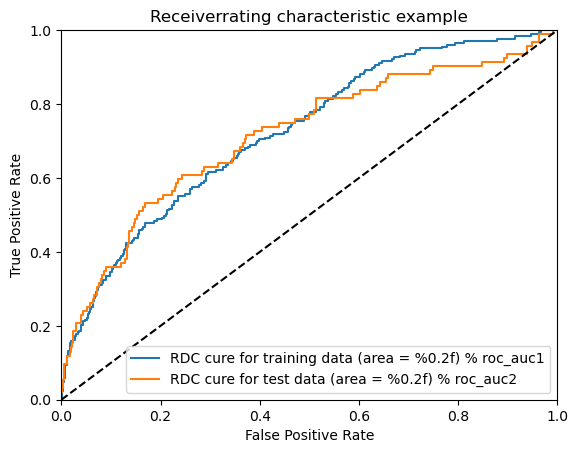

In [51]:
import pylab as pl
#Plot ROC Curve
pl.clf()
pl.plot(fpr1, tpr1, label='RDC cure for training data (area = %0.2f) % roc_auc1')
pl.plot(fpr2, tpr2, label='RDC cure for test data (area = %0.2f) % roc_auc2') 
pl.plot([0,1], [0,1], 'k--')
pl.xlim([0.0,1.0])
pl.ylim([0.0,1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

#### Lift Table for Train

In [52]:
# Create a DataFrame with predicted probabilities and actual labels
lift_df = pd.DataFrame({'Probability': x_train['pred_prob'], 'Actual': y_train.values.flatten()})
# Calculate deciles based on predicted probabilities
lift_df['Decile'] = pd.qcut(lift_df['Probability'], q=10, labels=False)
# Group by decile and calculate the required metrics
lift_table = lift_df.groupby('Decile').agg({
    'Probability': ['count', 'sum'],
    'Actual': 'sum'
}).reset_index()
# Rename columns for better understanding
lift_table.columns = ['Decile', 'Total', 'Probability', 'Actual']
# Calculate percentage of total, bad rate, and lift
lift_table['Percentage of Total'] = lift_table['Total'] / len(y_train) * 100
lift_table['Bad Rate'] = lift_table['Actual'] / lift_table['Total']
# Round 'Probability' column to integers
lift_table['Probability'] = lift_table['Probability'].astype(int)
# Calculate 'Good' as 'Total' - 'Actual'
lift_table['Good'] = lift_table['Total'] - lift_table['Actual']
# Convert 'Good' and 'Actual' columns to integers
lift_table['Good'] = lift_table['Good'].astype(int)
lift_table['Actual'] = lift_table['Actual'].astype(int)
# Rearrange columns
lift_table = lift_table[['Decile', 'Good', 'Actual', 'Total', 'Percentage of Total', 'Bad Rate']]
# Print the lift table
lift_table

,Decile,Good,Actual,Total,Percentage of Total,Bad Rate
0,0,267,5,272,10.003678,0.018382
1,1,269,3,272,10.003678,0.011029
2,2,265,7,272,10.003678,0.025735
3,3,257,15,272,10.003678,0.055147
4,4,252,20,272,10.003678,0.073529
5,5,257,14,271,9.966900,0.051661
6,6,252,21,273,10.040456,0.076923
7,7,250,21,271,9.966900,0.077491
8,8,239,33,272,10.003678,0.121324
9,9,208,64,272,10.003678,0.235294


<BarContainer object of 10 artists>

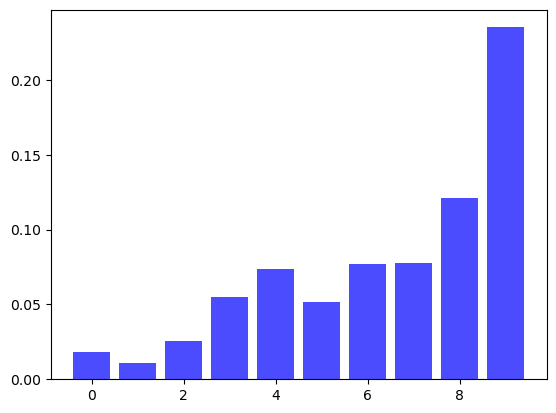

In [53]:
plt.bar(lift_table['Decile'], lift_table['Bad Rate'], color='blue', alpha=0.7)

#### Lift Table for Test

In [54]:
# Create a DataFrame with predicted probabilities and actual labels
lift_df = pd.DataFrame({'Probability': x_test['pred_prob'], 'Actual': y_test.values.flatten()})
# Calculate deciles based on predicted probabilities
lift_df['Decile'] = pd.qcut(lift_df['Probability'], q=10, labels=False)
# Group by decile and calculate the required metrics
lift_table = lift_df.groupby('Decile').agg({
    'Probability': ['count', 'sum'],
    'Actual': 'sum'
}).reset_index()
# Rename columns for better understanding
lift_table.columns = ['Decile', 'Total', 'Probability', 'Actual']
# Calculate percentage of total, bad rate, and lift
lift_table['Percentage of Total'] = lift_table['Total'] / len(y_test) * 100
lift_table['Bad Rate'] = lift_table['Actual'] / lift_table['Total']
# Round 'Probability' column to integers
lift_table['Probability'] = lift_table['Probability'].astype(int)
# Calculate 'Good' as 'Total' - 'Actual'
lift_table['Good'] = lift_table['Total'] - lift_table['Actual']
# Convert 'Good' and 'Actual' columns to integers
lift_table['Good'] = lift_table['Good'].astype(int)
lift_table['Actual'] = lift_table['Actual'].astype(int)
# Rearrange columns
lift_table = lift_table[['Decile', 'Good', 'Actual', 'Total', 'Percentage of Total', 'Bad Rate']]
# Print the lift table
lift_table

,Decile,Good,Actual,Total,Percentage of Total,Bad Rate
0,0,110,7,117,10.034305,0.059829
1,1,115,2,117,10.034305,0.017094
2,2,114,2,116,9.948542,0.017241
3,3,111,6,117,10.034305,0.051282
4,4,111,5,116,9.948542,0.043103
5,5,113,4,117,10.034305,0.034188
6,6,106,10,116,9.948542,0.086207
7,7,110,7,117,10.034305,0.059829
8,8,97,19,116,9.948542,0.163793
9,9,87,30,117,10.034305,0.256410


<BarContainer object of 10 artists>

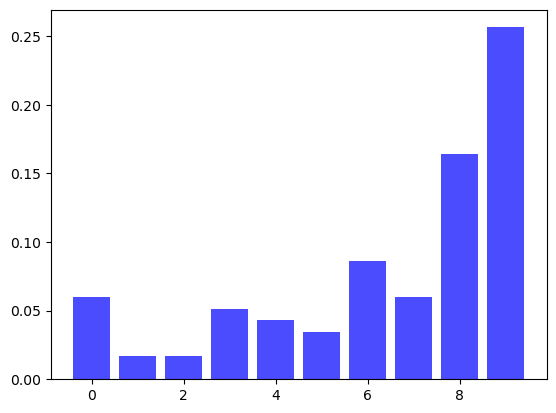

In [55]:
plt.bar(lift_table['Decile'], lift_table['Bad Rate'], color='blue', alpha=0.7)

### Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [57]:
df1 = pd.get_dummies(df_final)
x = df1.drop(columns = 'target')
y = df1['target']

depth = 15
length = int(df_final.shape[0]*0.05)
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = depth, min_samples_leaf = length, random_state = 20)
dt_model = dt.fit(x,y)
most_features_frame = pd.DataFrame(data = dt_model.feature_importances_,
                                  columns = ['importance'],
                                  index = x.columns).sort_values(by = ['importance'], ascending = False)

In [58]:
top_feature = most_features_frame.index[:20]
top_feature

Index(['no_enq_l12', 'net_income_-_age', 'customer_type_SELF EMPLOYED', 'bb',
       'months_in_current_job', 'unsec_os_amt', 'no_enq_l12_-_age',
       'no_enq_-_age', 'months_in_current_job_bkt_(4.0, 48.0]',
       'avg_debt_days', 'months_in_city', 'gross_income',
       'no_enq_l12_bkt_(1.0, 2.0]', 'no_enq_l12_bkt_(2.0, 3.0]',
       'no_enq_l12_bkt_(-0.001, 1.0]', 'no_enq_l12_bkt_(3.0, 5.0]',
       'no_acc_lc_bkt_(6.0, 109.0]', 'no_acc_lc_bkt_(2.0, 6.0]',
       'no_acc_lc_bkt_(0.999, 2.0]', 'debt_ratio_bkt_(0.63, 1311486.0]'],
      dtype='object')

In [59]:
c = most_features_frame.index[:10]
sorted(c)

['avg_debt_days',
 'bb',
 'customer_type_SELF EMPLOYED',
 'months_in_current_job',
 'months_in_current_job_bkt_(4.0, 48.0]',
 'net_income_-_age',
 'no_enq_-_age',
 'no_enq_l12',
 'no_enq_l12_-_age',
 'unsec_os_amt']

In [60]:
output = []
from itertools import combinations
for combination_length in range(7, 11):
    variable_combinations = list(combinations(c, combination_length))
    output.append(variable_combinations)

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

model_performance_data = []

for j in output:
    for i in j:
        x = list(i)
        x2 = df1[x]
        dt = DecisionTreeClassifier(criterion='gini', max_depth=depth, min_samples_leaf=length, random_state=23)
        dt_model = dt.fit(x2, y)
        train_pred = dt_model.predict_proba(x2)[:, 1]  # Probabilities of positive class
        roc_auc = roc_auc_score(y, train_pred)
        model_performance_data.append((i, roc_auc))

In [62]:
df_model_performance = pd.DataFrame(model_performance_data, columns=['Variable', 'ROC_AUC_Score'])
df_model_performance['no_of_var'] = df_model_performance['Variable'].apply(len)
df_model_performance.sort_values(by = 'ROC_AUC_Score',ascending = False).head(10)

,Variable,ROC_AUC_Score,no_of_var
173,"(no_enq_l12, customer_type_SELF EMPLOYED, bb, ...",0.748654,9
175,"(no_enq_l12, net_income_-_age, customer_type_S...",0.748553,10
169,"(no_enq_l12, net_income_-_age, customer_type_S...",0.748500,9
149,"(no_enq_l12, customer_type_SELF EMPLOYED, bb, ...",0.747223,8
166,"(no_enq_l12, net_income_-_age, customer_type_S...",0.746981,9
127,"(no_enq_l12, net_income_-_age, customer_type_S...",0.746927,8
60,"(no_enq_l12, customer_type_SELF EMPLOYED, bb, ...",0.745709,7
151,"(no_enq_l12, customer_type_SELF EMPLOYED, bb, ...",0.745709,8
124,"(no_enq_l12, net_income_-_age, customer_type_S...",0.745592,8
168,"(no_enq_l12, net_income_-_age, customer_type_S...",0.745592,9


In [63]:
grouped_data = pd.pivot_table(df_model_performance,values = 'ROC_AUC_Score',index = 'no_of_var',aggfunc=['min','mean','max'])
grouped_data

,min,mean,max
,ROC_AUC_Score,ROC_AUC_Score,ROC_AUC_Score
no_of_var,,,
7,0.707395,0.731747,0.745709
8,0.715729,0.736936,0.747223
9,0.724599,0.742136,0.748654
10,0.748553,0.748553,0.748553


In [64]:
df_model_performance = df_model_performance[df_model_performance['no_of_var'] == 9]
df_model_performance['ROC_AUC_Score'] = (df_model_performance['ROC_AUC_Score'] * 100).round(2).astype(str) + '%'
df_model_performance.sort_values(by = 'ROC_AUC_Score',ascending=False)

,Variable,ROC_AUC_Score,no_of_var
173,"(no_enq_l12, customer_type_SELF EMPLOYED, bb, ...",74.87%,9
169,"(no_enq_l12, net_income_-_age, customer_type_S...",74.85%,9
166,"(no_enq_l12, net_income_-_age, customer_type_S...",74.7%,9
168,"(no_enq_l12, net_income_-_age, customer_type_S...",74.56%,9
170,"(no_enq_l12, net_income_-_age, customer_type_S...",74.5%,9
167,"(no_enq_l12, net_income_-_age, customer_type_S...",74.42%,9
165,"(no_enq_l12, net_income_-_age, customer_type_S...",74.37%,9
174,"(net_income_-_age, customer_type_SELF EMPLOYED...",73.91%,9
171,"(no_enq_l12, net_income_-_age, customer_type_S...",73.51%,9
172,"(no_enq_l12, net_income_-_age, bb, months_in_c...",72.46%,9


In [65]:
var = df_model_performance['Variable'].loc[166]
var = list(var)
var

['no_enq_l12',
 'net_income_-_age',
 'customer_type_SELF EMPLOYED',
 'bb',
 'months_in_current_job',
 'unsec_os_amt',
 'no_enq_l12_-_age',
 'no_enq_-_age',
 'avg_debt_days']

In [66]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

X = df1[var]
y = df1['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the depths and leaf sizes to test
depths = [2, 5, 8, 10, 11]
leaf_sizes = [1, 5, 10, 15, 20]

# Store results in a dataframe
results = []

# Iterate over all combinations of depths and leaf sizes
for depth in depths:
    for leaf_size in leaf_sizes:
        # Train decision tree
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf_size, random_state=42)
        dt.fit(X_train, y_train)
        
        # Predict probabilities
        train_probs = dt.predict_proba(X_train)[:, 1]
        test_probs = dt.predict_proba(X_test)[:, 1]
        
        # Calculate ROC AUC score
        train_roc_auc = roc_auc_score(y_train, train_probs)
        test_roc_auc = roc_auc_score(y_test, test_probs)
        
        # Append results to dataframe
        results.append({'Depth_Leaf_Size': str(depth)+"_"+str(leaf_size),
                                  'Train ROC AUC': train_roc_auc,
                                  'Test ROC AUC': test_roc_auc})
results_df = pd.DataFrame(results)

In [67]:
results_df['Diff'] = abs(results_df['Train ROC AUC'] - results_df['Test ROC AUC'])
results_df = results_df.sort_values(by = 'Diff' ,ascending= True)
results_df

,Depth_Leaf_Size,Train ROC AUC,Test ROC AUC,Diff
3,2_15,0.672783,0.677130,0.004347
4,2_20,0.672783,0.677130,0.004347
2,2_10,0.629190,0.621530,0.007660
0,2_1,0.627368,0.614389,0.012979
1,2_5,0.627368,0.614389,0.012979
6,5_5,0.733909,0.690092,0.043816
7,5_10,0.738387,0.677301,0.061086
8,5_15,0.771748,0.706913,0.064835
5,5_1,0.734609,0.658082,0.076526
9,5_20,0.779505,0.684760,0.094745


In [68]:
X = df1[var]
y = df1['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

results = []

# Train decision tree
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, random_state=42)
dt.fit(X_train, y_train)

# Predict probabilities
train_probs = dt.predict_proba(X_train)[:, 1]
test_probs = dt.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
train_roc_auc = roc_auc_score(y_train, train_probs)
test_roc_auc = roc_auc_score(y_test, test_probs)

# Append results to dataframe
results.append({'Depth_Leaf_Size': str(5)+"_"+str(15),
                            'Train ROC AUC': train_roc_auc,
                            'Test ROC AUC': test_roc_auc})
results_df = pd.DataFrame(results)

In [69]:
results_df

,Depth_Leaf_Size,Train ROC AUC,Test ROC AUC
0,5_15,0.781269,0.660796


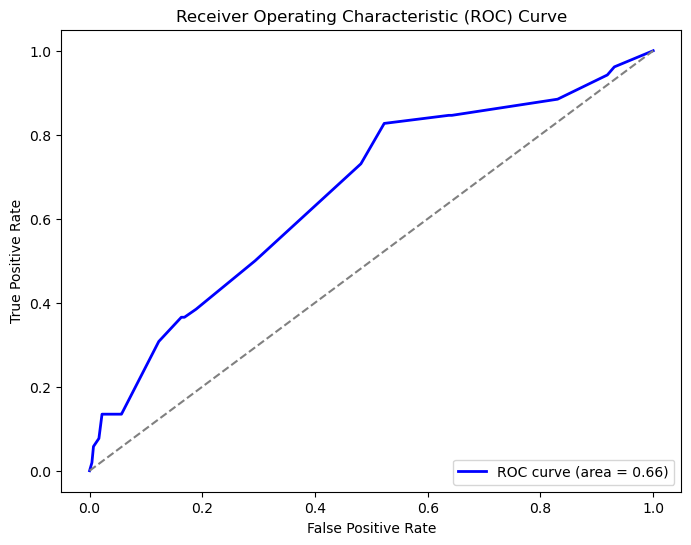

In [70]:
from sklearn.metrics import roc_curve

# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, test_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [71]:
# Predict probabilities
train_probs = dt.predict_proba(X_train)[:, 1]
test_probs = dt.predict_proba(X_test)[:, 1]

# Create a DataFrame with predicted probabilities and actual labels
lift_df_train = pd.DataFrame({'Probability': train_probs, 'Actual': y_train.values})
lift_df_test = pd.DataFrame({'Probability': test_probs, 'Actual': y_test.values})

# Calculate deciles based on predicted probabilities with dropping duplicates
lift_df_train['Decile'] = pd.qcut(lift_df_train['Probability'], q=10, labels=False, duplicates='drop')
lift_df_test['Decile'] = pd.qcut(lift_df_test['Probability'], q=10, labels=False, duplicates='drop')

# Group by decile and calculate the required metrics for training data
lift_table_train = lift_df_train.groupby('Decile').agg({
    'Probability': ['count', 'sum'],
    'Actual': 'sum'
}).reset_index()

# Group by decile and calculate the required metrics for testing data
lift_table_test = lift_df_test.groupby('Decile').agg({
    'Probability': ['count', 'sum'],
    'Actual': 'sum'
}).reset_index()

# Rename columns for better understanding for training data
lift_table_train.columns = ['Decile', 'Total', 'Probability', 'Actual']

# Rename columns for better understanding for testing data
lift_table_test.columns = ['Decile', 'Total', 'Probability', 'Actual']

# Calculate percentage of total, bad rate, and lift for training data
lift_table_train['Percentage of Total'] = lift_table_train['Total'] / len(y_train) * 100
lift_table_train['Bad Rate'] = lift_table_train['Actual'] / lift_table_train['Total']
lift_table_train['Lift'] = lift_table_train['Bad Rate'] / (len(y_train[y_train == 1]) / len(y_train))

# Calculate percentage of total, bad rate, and lift for testing data
lift_table_test['Percentage of Total'] = lift_table_test['Total'] / len(y_test) * 100
lift_table_test['Bad Rate'] = lift_table_test['Actual'] / lift_table_test['Total']
lift_table_test['Lift'] = lift_table_test['Bad Rate'] / (len(y_test[y_test == 1]) / len(y_test))

# Round 'Probability' column to integers for training data
lift_table_train['Probability'] = lift_table_train['Probability'].astype(int)

# Round 'Probability' column to integers for testing data
lift_table_test['Probability'] = lift_table_test['Probability'].astype(int)

In [72]:
lift_table_train

,Decile,Total,Probability,Actual,Percentage of Total,Bad Rate,Lift
0,0,576,6,6,18.532819,0.010417,0.133230
1,1,496,13,13,15.958816,0.026210,0.335225
2,2,354,13,13,11.389961,0.036723,0.469694
3,3,131,5,5,4.214929,0.038168,0.488173
4,4,594,39,39,19.111969,0.065657,0.839756
5,5,279,20,20,8.976834,0.071685,0.916855
6,6,72,9,9,2.316602,0.125000,1.598765
7,7,435,74,74,13.996139,0.170115,2.175791
8,8,171,64,64,5.501931,0.374269,4.786947


<BarContainer object of 9 artists>

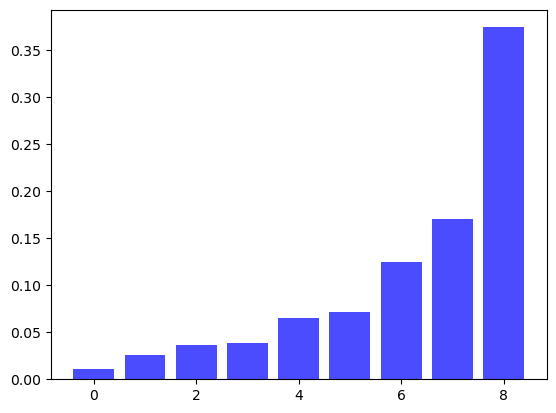

In [73]:
plt.bar(lift_table_train['Decile'], lift_table_train['Bad Rate'], color='blue', alpha=0.7)

In [74]:
lift_table_test

,Decile,Total,Probability,Actual,Percentage of Total,Bad Rate,Lift
0,0,129,1,6,16.602317,0.046512,0.694991
1,1,138,3,2,17.760618,0.014493,0.216555
2,2,88,3,1,11.325611,0.011364,0.169799
3,3,35,1,5,4.504505,0.142857,2.134615
4,4,148,9,12,19.047619,0.081081,1.211538
5,5,82,5,6,10.553411,0.073171,1.093340
6,6,16,2,1,2.059202,0.062500,0.933894
7,7,93,15,12,11.969112,0.129032,1.928040
8,8,48,18,7,6.177606,0.145833,2.179087


<BarContainer object of 9 artists>

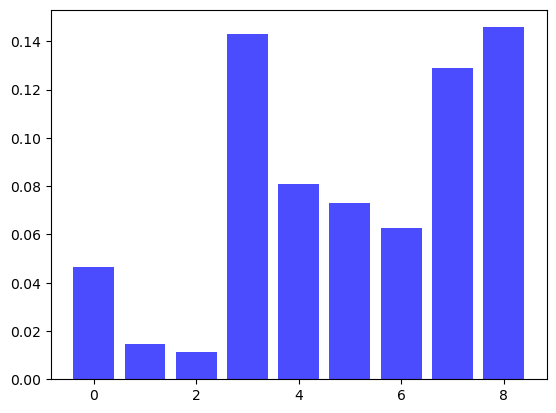

In [75]:
plt.bar(lift_table_test['Decile'], lift_table_test['Bad Rate'], color='blue', alpha=0.7)

### Final Model

In [76]:
df_final['age_bkt'] = pd.qcut(df_final['age'], q=5)
df_final['bb_bkt'] = pd.qcut(df_final['bb'],q=4)
df_final['gross_income_bkt'] = pd.qcut(df_final['gross_income'],q=5)
df_final['no_enq_bkt'] = pd.qcut(df_final['no_enq'],q=5)
df_final['days_last_acc_lc_bkt'] = pd.qcut(df_final['days_last_acc_lc'],q=5)
df_final['os_amt_bkt'] = pd.qcut(df_final['os_amt'],q=3)
df_final['unsec_os_amt_bkt'] = pd.cut(df_final['unsec_os_amt'], bins=bins3)
df_final['no_hl_enq_bkt'] = pd.qcut(df_final['no_hl_enq'],q=3)
df_final['months_in_current_job_bkt'] = pd.qcut(df_final['months_in_current_job'],q=4)
df_final['months_in_city_bkt'] = pd.qcut(df_final['months_in_city'],q=3)
df_final['avg_debt_days_bkt'] = pd.qcut(df_final['avg_debt_days'],q=4)
df_final['debt_ratio_bkt'] = pd.qcut(df_final['debt_ratio'],q=5)
df_final['no_acc_lc_bkt'] = pd.qcut(df_final['no_acc_lc'],q=3)
df_final['no_enq_l12_bkt'] = pd.qcut(df_final['no_enq_l12'],q=5)
df_final['no_live_acc_bkt'] = pd.qcut(df_final['no_live_acc'],q=4)
df_final['no_live_unsec_acc_bkt'] = pd.cut(df_final['no_live_unsec_acc'], bins=bins1, labels=['(-0.001, 1.0]', '(1.0, 2.0]', '(2.0, 4.0]', '(4.0, 18.0]'])
df_final['no_def_l12_bkt'] = pd.cut(df_final['no_def_l12'], bins=bins2, labels=['(-0.001, 1.0]', '(1.0, 2.0]', '(2.0, 7.0]'])
df_final['no_enq_l12_-_age_bkt'] = pd.qcut(df_final['no_enq_l12_-_age'],q=5)
df_final['no_enq_-_age_bkt'] = pd.qcut(df_final['no_enq_-_age'],q=5)
df_final['net_income_-_age_bkt'] = pd.qcut(df_final['net_income_-_age'],q=5)


x = df_final[['age_bkt','bb_bkt','gross_income_bkt','no_enq_bkt',
        'days_last_acc_lc_bkt','os_amt_bkt','unsec_os_amt_bkt','no_hl_enq_bkt',
        'months_in_current_job_bkt','months_in_city_bkt','avg_debt_days_bkt','debt_ratio_bkt',
        'no_acc_lc_bkt','no_enq_l12_bkt','no_live_acc_bkt','no_live_unsec_acc_bkt',
        'no_def_l12_bkt','no_enq_l12_-_age_bkt','no_enq_-_age_bkt','net_income_-_age_bkt'
             ]]
y = df_final[['target']]
x = pd.get_dummies(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=44)

log_reg = sm.Logit(y_train, x_train).fit()
x_train['pred_prob'] = log_reg.predict(x_train)
x_test['pred_prob'] = log_reg.predict(x_test)
fpr1, tpr1, thresholds1 = roc_curve(y_train, x_train['pred_prob'])
roc_auc1 = auc(fpr1, tpr1)
gini1 = (2*roc_auc1)-1
print("Area under the ROC curve for train dataset : %f" % roc_auc1)
print("---"*15)
fpr2, tpr2, thresholds2 = roc_curve(y_test, x_test['pred_prob'])
roc_auc2 = auc(fpr2, tpr2)
gini2 = (2*roc_auc2)-1
print("Area under the ROC curve for test dataset : %f" % roc_auc2)

         Current function value: 0.240479
         Iterations: 35
Area under the ROC curve for train dataset : 0.723770
---------------------------------------------
Area under the ROC curve for test dataset : 0.714244
